In [144]:
Juar,Kuar=16,16
putinsky=randn(Juar,Kuar)
map!(x->floor(x), putinsky)
putete=map(x->convert(Int16, x), putinsky)

16x16 Array{Int16,2}:
  0  -2   1   0  -1   0   0   0  -1   0   0  -1  -1   1  -1   1
 -1  -1  -2   1   0  -1   0   1  -1   0   0  -2   0   1   0   0
 -1  -1  -1   2  -2  -1   0   0   0  -2   1   0  -1  -1  -1   1
  0   0  -1  -1   0  -2  -2  -2  -2  -1   1  -2   0   1   1   0
 -1  -1  -3   0   0   0  -2  -1  -1   0   1   0  -2   0  -1   1
 -1   0  -2   1  -1  -1   0   0   0   0  -3  -1   0   0   0  -1
  0   1  -1   0  -1  -2   0   0  -1  -2  -1  -2   0   3   0   0
 -1  -1   0   0  -2   1   0  -2   0   0  -2  -2   0   1  -2  -1
  0   0   0  -1   1   1  -1  -1  -1  -2   0   1  -2   0  -1   1
  0  -2   1   0  -1  -1   1   1  -1   0   0   0   0  -1  -1  -2
  1   1   0   1   1  -1   0   0  -2  -1  -1  -1  -2   0   0   0
  0   0   0  -2  -1   0  -1   1  -1   0   2   0   0   2   0  -1
  0  -2  -1  -2  -1   0  -2   0  -1   0  -1   1   0   0   1   0
 -1   0   0  -1  -1   0  -1   1   0  -1  -1   0  -1  -1   0  -1
 -1  -1   0   0  -2  -1   0  -2  -3  -2   1  -1  -1   0  -1   1
  0  -1   0   0  -

In [2]:
using PyPlot

INFO: Loading help data...


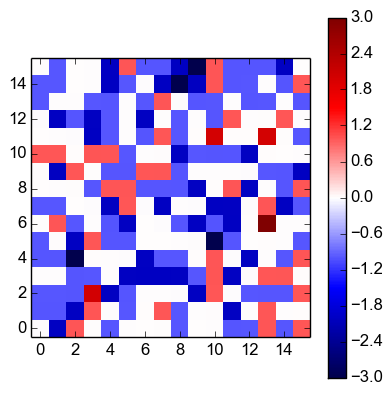

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f9a45f0c8c0>

In [153]:
figure(figsize=(4.5,4.5))

imagen=imshow(putete, cmap="seismic", interpolation="none", vmin=-3, vmax=3, origin="lower")
colorbar(imagen)

In [146]:
ActividadNegativa=Array{Int64}[]
#ActividadPositiva=Graph()
#SpikeCountPositivo=zeros(64,64);
SpikeCountNegativo=zeros(Juar,Kuar);
SpikeCountTotal=zeros(Juar,Kuar;)
for j=1:Juar, k=1:Kuar          
    if(putete[j,k]>0.0)      
        push!(ActividadNegativa, [j, k])
        SpikeCountNegativo[j,k]+=1
    #elseif(putete[j,k]>0.0) 
    #    ActividadPositiva=vcat(ActividadPositiva, [j, k])
    #    SpikeCountPositivo[j,k]+=1
    end
end

In [111]:
typeof(ActividadNegativa[3])

Array{Int64,1}

In [139]:
function vecindad8(punto::Array)
    j=punto[1]
    k=punto[2]
    result=Set{Array{Int64,1}}()
    push!(result, [j-1,k-1])
    push!(result, [j-1,k])
    push!(result, [j-1,k+1])
    push!(result, [j,k-1])
    push!(result, [j,k+1])
    push!(result, [j+1,k-1])
    push!(result, [j+1,k])
    push!(result, [j+1,k+1])
    return result
end
    

vecindad8 (generic function with 1 method)

In [87]:
(vecindad8(ActividadNegativa[end]), ActividadNegativa[end])

(Set{Array{Int64,1}}({[3,3],[4,3],[5,5],[4,5],[5,4],[3,4],[3,5],[5,3]}),[4,4])

In [151]:
#Simple pass method
lista=copy(ActividadNegativa)
curlab=0
componentes=Set{Any}()
while(length(lista)!=0)
    x=pop!(lista) #arranca el ULTIMO elemento de la lista
    listaprofundeza=Array{Int64}[]
    componentecurlab=Array{Int64}[]
    push!(listaprofundeza, x) #Pone elementos al FINAL de la lista
    push!(componentecurlab, x)    
    profundidad=0
    while ((length(listaprofundeza)!=0) && profundidad<100)
        y=pop!(listaprofundeza)
        for v in vecindad8(y)
                if in(v, lista)
             #   println(indexin({v},lista), v)
                deleteat!(lista, indexin({v}, lista))
            #    println(v, "si estaba en la lista")
             #   println(lista)
                    push!(listaprofundeza, v)
                    profundidad+=1
                    push!(componentecurlab, v)
                else
                    #println(v, "no estaba en la lista")
                end
            end
    end
    # println("Para ", x, "la profundidad fue ", profundidad)
    curlab+=1
    push!(componentes, componentecurlab)
end
curlab

20

In [116]:
lista

0-element Array{Array{Int64,N},1}

In [154]:
for x in componentes
    println(x)
end

Array{Int64,N}[[16,6]]
Array{Int64,N}[[5,16],[4,15],[3,16],[4,14]]
Array{Int64,N}[[12,8]]
Array{Int64,N}[[9,16]]
Array{Int64,N}[[15,16]]
Array{Int64,N}[[13,15],[12,14]]
Array{Int64,N}[[11,5],[11,4],[10,3],[11,2],[11,1]]
Array{Int64,N}[[9,12]]
Array{Int64,N}[[7,2]]
Array{Int64,N}[[10,8],[10,7],[9,6],[8,6],[9,5]]
Array{Int64,N}[[5,11],[4,11],[3,11]]
Array{Int64,N}[[16,11],[15,11]]
Array{Int64,N}[[13,12],[12,11]]
Array{Int64,N}[[3,4],[2,4],[1,3]]
Array{Int64,N}[[2,14],[1,14]]
Array{Int64,N}[[8,14],[7,14]]
Array{Int64,N}[[1,16]]
Array{Int64,N}[[14,8]]
Array{Int64,N}[[6,4]]
Array{Int64,N}[[2,8]]


In [155]:
centrosdemasa=[[0 0 0];]
for p in componentes
    masa=0.00
    x=0.00
    y=0.00
    for q in p
        j=q[1]
        k=q[2]
        masalocal=putete[j,k]
        masa+=masalocal
        x+=k*masalocal
        y+=j*masalocal
    end
    x/=masa
    y/=masa
    A=[x y masa]
    centrosdemasa=vcat(centrosdemasa, A)
end
centrosdemasa=centrosdemasa[2:end,:]

20x3 Array{Float64,2}:
  6.0     16.0     1.0
 15.25     4.0     4.0
  8.0     12.0     1.0
 16.0      9.0     1.0
 16.0     15.0     1.0
 14.3333  12.3333  3.0
  3.0     10.8     5.0
 12.0      9.0     1.0
  2.0      7.0     1.0
  6.4      9.2     5.0
 11.0      4.0     3.0
 11.0     15.5     2.0
 11.3333  12.3333  3.0
  3.75     2.25    4.0
 14.0      1.5     2.0
 14.0      7.25    4.0
 16.0      1.0     1.0
  8.0     14.0     1.0
  4.0      6.0     1.0
  8.0      2.0     1.0

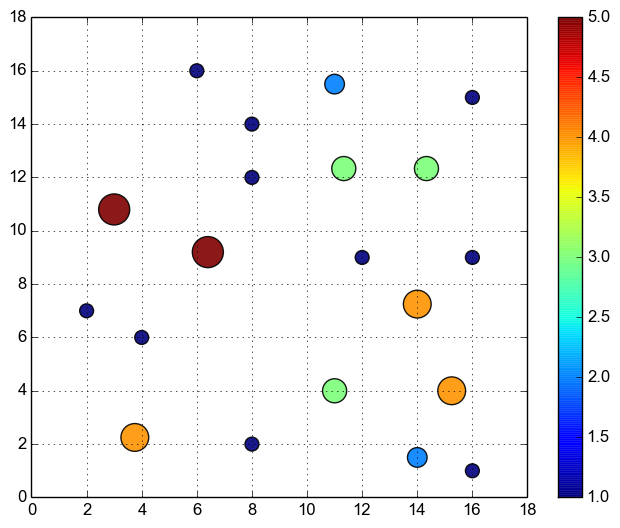

In [156]:
imagen=scatter(centrosdemasa[:,1], centrosdemasa[:,2], c=centrosdemasa[:,3], s=abs(100*centrosdemasa[:,3]), alpha=0.9)
colorbar(imagen)
grid()

In [183]:
length(componentes)

135

In [72]:
testlista=[1, 2, 3, 4, 5, 6, 8, 13, 88, 87, 89]

11-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  8
 13
 88
 87
 89

In [67]:
function dosvecindad(x)
    result=Set()
    push!(result, x-1)
    push!(result, x+1)
    return result
end

dosvecindad (generic function with 1 method)

In [76]:
#Simple pass method
lista=copy(testlista)
curlab=0
componentes=Set{Any}()
while(length(lista)!=0)
    x=pop!(lista) #arranca el ULTIMO elemento de la lista
    println(x)
    println(lista)
    listaprofundeza=Int64[]
    componentecurlab=Int64[]
    push!(listaprofundeza, x) #Pone elementos al FINAL de la lista
    push!(componentecurlab, x)    
    profundidad=0  
    while ((length(listaprofundeza)!=0) && profundidad<10)
        x=pop!(listaprofundeza)
        println("esta es listaprofundeza: ", listaprofundeza)
        for v in dosvecindad(x)
                if in(v, lista)
                println(v, "yo si estaba en la lista")
                    deleteat!(lista, findin(lista, v))
                println("y asi quedo la lista")
                println(lista)
                    push!(listaprofundeza, v)
                    profundidad+=1
                    push!(componentecurlab, v)
                else
                    println(v, "no estaba en la lista")
                end
            end
        println("para ", x, " la profuÇndidad fue de ", profundidad)
    end
    curlab+=1
    push!(componentes, componentecurlab)
end
curlab

89
[1,2,3,4,5,6,8,13,88,87]
esta es listaprofundeza: []
88yo si estaba en la lista
y asi quedo la lista
[1,2,3,4,5,6,8,13,87]
90no estaba en la lista
para 89 la profuÇndidad fue de 1
esta es listaprofundeza: []
89no estaba en la lista
87yo si estaba en la lista
y asi quedo la lista
[1,2,3,4,5,6,8,13]
para 88 la profuÇndidad fue de 2
esta es listaprofundeza: []
86no estaba en la lista
88no estaba en la lista
para 87 la profuÇndidad fue de 2
13
[1,2,3,4,5,6,8]
esta es listaprofundeza: []
14no estaba en la lista
12no estaba en la lista
para 13 la profuÇndidad fue de 0
8
[1,2,3,4,5,6]
esta es listaprofundeza: []
7no estaba en la lista
9no estaba en la lista
para 8 la profuÇndidad fue de 0
6
[1,2,3,4,5]
esta es listaprofundeza: []
7no estaba en la lista
5yo si estaba en la lista
y asi quedo la lista
[1,2,3,4]
para 6 la profuÇndidad fue de 1
esta es listaprofundeza: []
4yo si estaba en la lista
y asi quedo la lista
[1,2,3]
6no estaba en la lista
para 5 la profuÇndidad fue de 2
esta es listap

4

In [77]:
componentes

Set{Any}({[89,88,87],[8],[13],[6,5,4,3,2,1]})

In [11]:
conter=0
for a in ActividadNegativa.vertices
    for v in vecindad8(a)
        if ( in(v, ActividadNegativa.vertices)) 
            conter+=1
            lado=ExEdge(conter, a, v)
            push!(ActividadNegativa.edges, lado)
        end
    end
end
conter

8016

In [53]:
testlista

8-element Array{Int64,1}:
  1
  2
  3
  4
  6
  8
 13
 90

In [5]:
add_edge!(gr, 2,3)
add_edge!(gr, 1,3)
add_edge!(gr, 5,3)
add_edge!(gr, 4,1)


edge [4]: 4 -- 1

In [8]:
plot(gr)

Failed to open XLIB display: 


In [18]:
?Graphs

Symbol not found. Falling back on apropos search ...
No help information found.


In [20]:
Pkg.installed("Graphs")

v"0.5.2"